# (Draft Mode)

Taken from [this Holoview Intro Notebook](https://nbviewer.jupyter.org/github/jlstevens/website-notebooks/blob/master/Introducing_HoloViews.ipynb). I use this to learn about Holoview.

In [1]:
from itertools import islice
import numpy as np
import holoviews as hv

In [2]:
bounds = (-2,-1.4,0.8,1.4) # Area of the complex plane

def mandelbrot_generator(h,w, maxit, bounds=bounds):
    """
    Generator that yields the mandlebrot set.
    """
    (l,b,r,t) = bounds
    y,x = np.ogrid[b:t : h*1j, l:r:w*1j]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime==maxit)
        divtime[div_now] = i
        z[diverge] = 2
        yield divtime
        
def mandelbrot(h,w, n, maxit):
    iterable =  mandelbrot_generator(h,w, maxit)
    return next(islice(iterable, n, None))

In [3]:
%load_ext holoviews.ipython
%output holomap='widgets' size=125

:Image   [x,y]   (z)
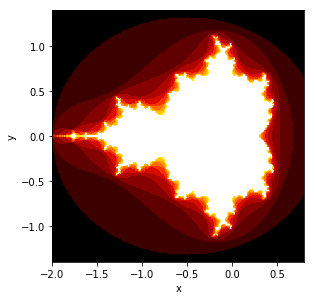

In [4]:
arr = mandelbrot(400,400, 10, 11)
hv.Image(arr, bounds=bounds)

In [5]:
arr.shape

(400, 400)

:HoloMap   [Default]
   :Image   [x,y]   (z)
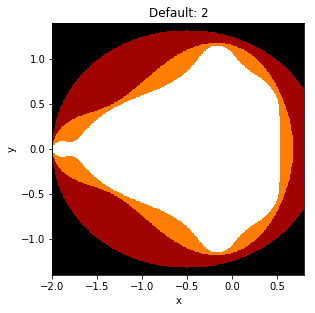
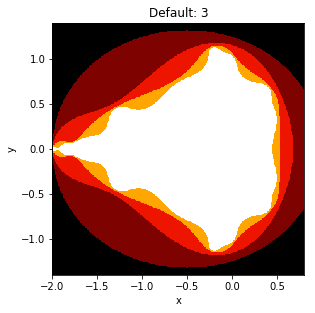
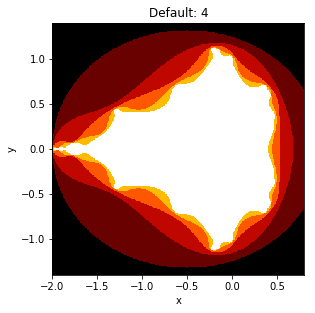
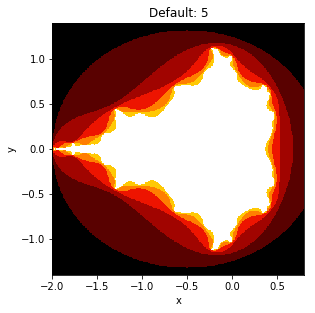
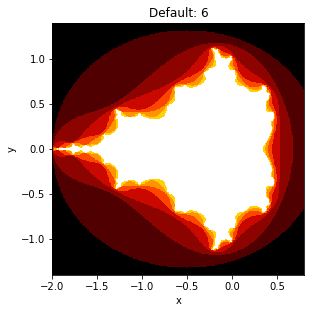
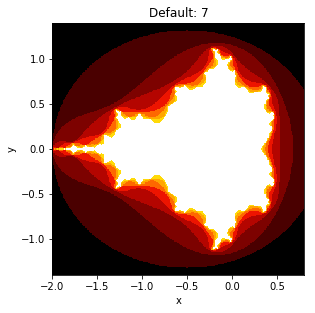
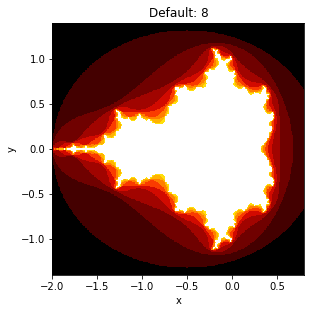
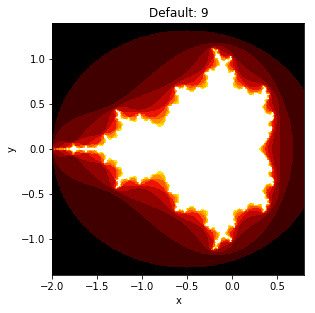
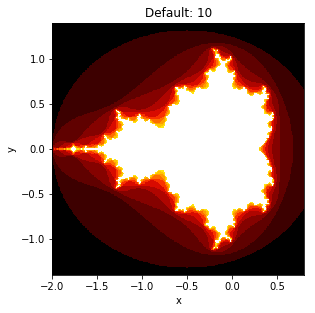
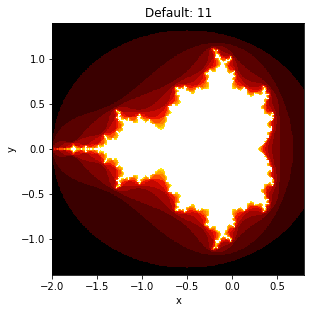
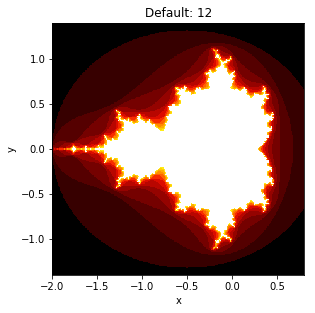
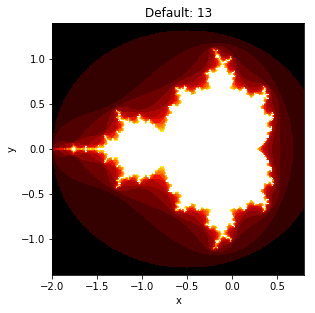
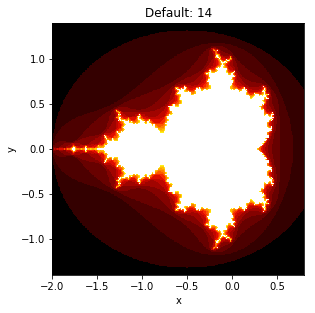
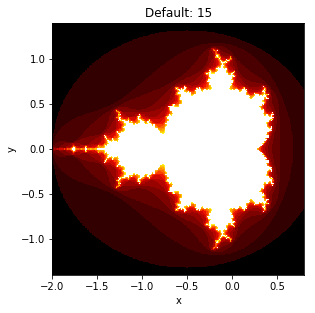
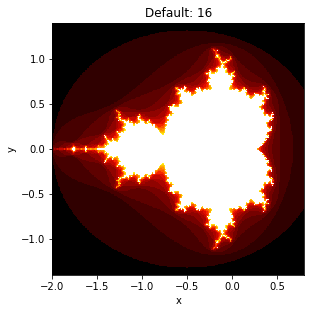
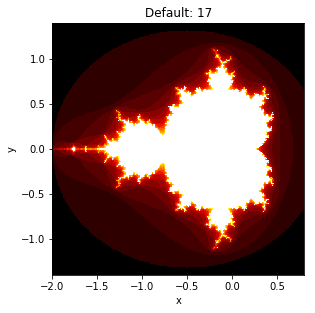
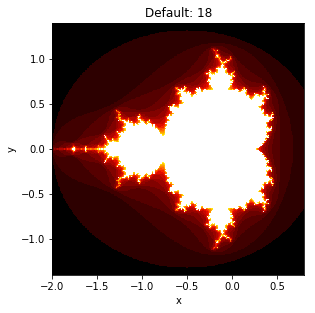
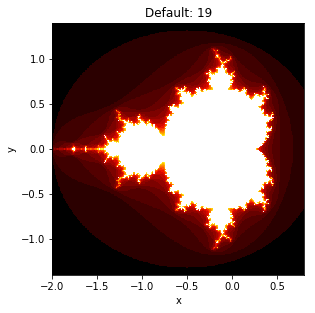
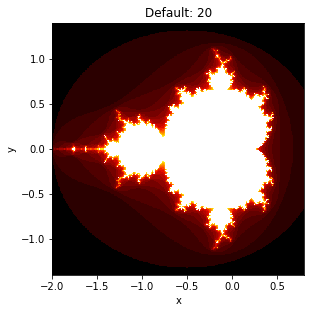
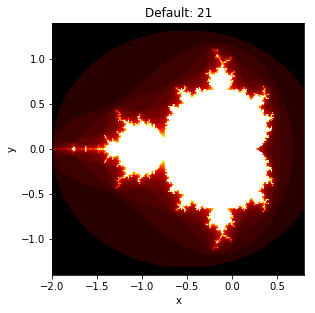
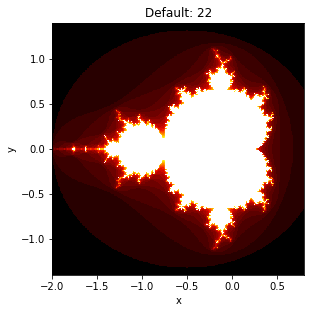
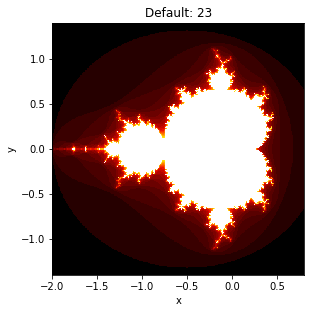
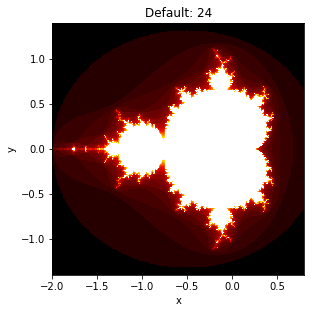
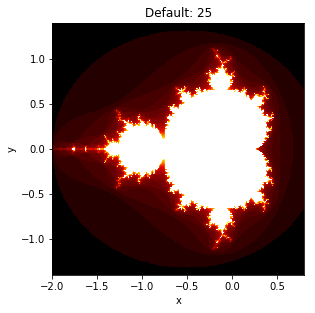
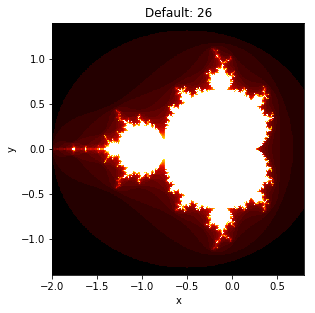
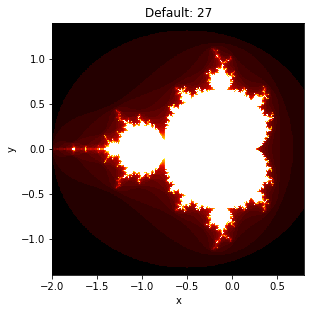
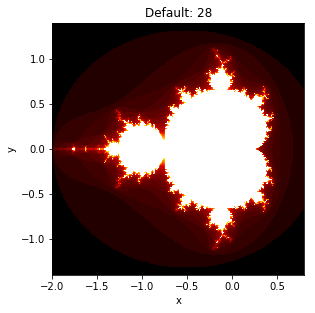
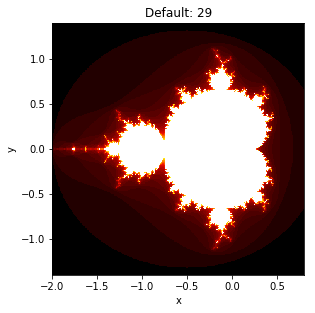
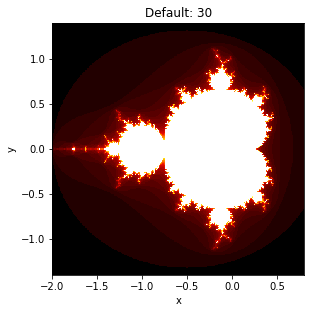
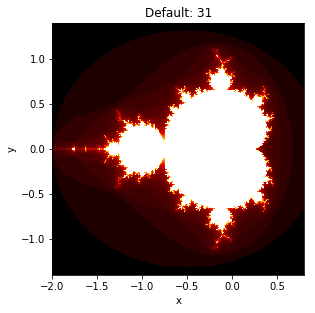
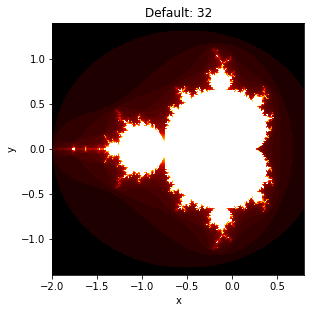
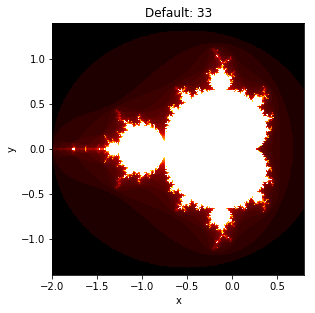
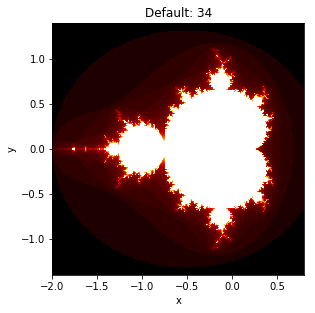
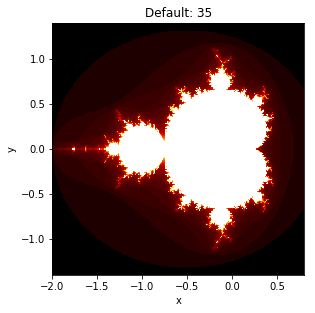
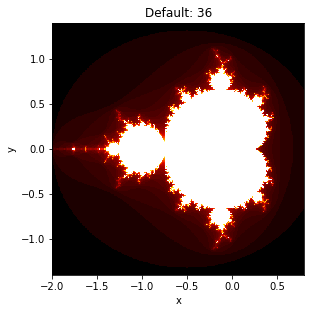
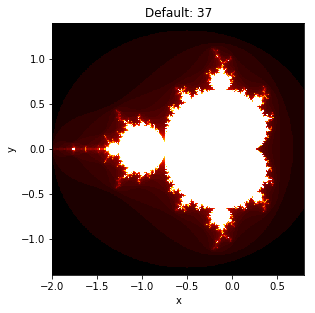
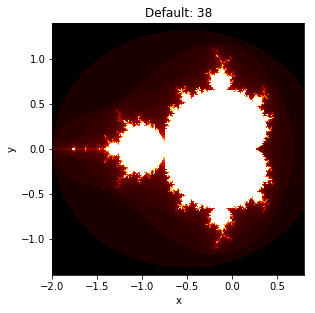
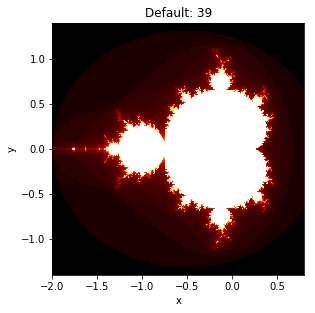
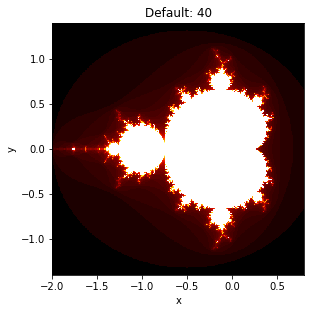

In [6]:
%%opts Image {+framewise}
hv.HoloMap({i:hv.Image(mandelbrot(400,400, i, i+1).copy(), bounds=bounds)
            for i in range(2,41)}, key_dimensions=['Iterations'])

In [7]:
render = mandelbrot(400,400, 50,51) # 50 iterations at 4000x4000

In [8]:
render.shape

(400, 400)

:Layout
   .Overlay.I :Overlay
      .Image.I  :Image   [x,y]   (z)
      .Bounds.I :Bounds   [x,y]
   .Image.I   :Image   [x,y]   (z)
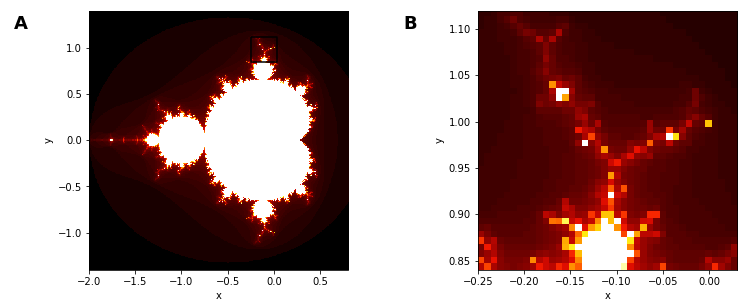

In [9]:
(left, bottom, right, top) =  (-0.25, 1.12, 0.03, 0.84)
image = hv.Image(render, bounds=bounds)
roi= image[left:right, bottom:top]
image * hv.Bounds((left, bottom, right, top)) + roi

In [10]:
def disk(radius, resolution=512):
    lin = np.linspace(-0.25, 0.25, resolution)
    x,y = np.meshgrid(lin, lin)
    distance_from_origin = np.sqrt(x**2+y**2)
    return (distance_from_origin>=radius)

disk(0.3, resolution=7)

array([[ True,  True, False, False, False,  True,  True],
       [ True, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True, False, False, False, False, False,  True],
       [ True,  True, False, False, False,  True,  True]], dtype=bool)

In [11]:
%%opts Overlay [xaxis=None yaxis=None]
mask = hv.Image(disk(0.25), value_dimensions=[hv.Dimension('Channel', range=(0,1))])
rgb_mask = hv.RGB(mask * mask * mask * mask)
hv.Image(render) * rgb_mask + hv.Image(roi.data) * rgb_mask

ValueError: Ranges must be defined on all the value dimensions of all the Images

In [12]:
%%opts Overlay [xaxis=None yaxis=None]
data={lvl:(hv.operation.contours(hv.Image(roi.data), levels=[lvl]) * rgb_mask) for lvl in range(3,11)}
hmap = hv.HoloMap(data, key_dimensions=['Level'])
hmap

NameError: name 'rgb_mask' is not defined